## **Important** **packages**

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import important packages 
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
%matplotlib inline

## **Read Data**

In [ ]:
#Load the MCSDataset
!gdown --id 1TN747ThLte9eOABv5fIkdr_4L2kO3AE4

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TN747ThLte9eOABv5fIkdr_4L2kO3AE4
To: /content/MCSDatasetNEXTCONLab.csv
100% 867k/867k [00:00<00:00, 111MB/s]


In [ ]:
df= pd.read_csv('/content/MCSDatasetNEXTCONLab.csv')
df.sample(frac=1  , random_state=2).reset_index(drop=True)
df.head()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1


In [ ]:
df.drop('ID', inplace=True, axis=1)

In [ ]:
#split the training data into data and target
dataset = df.iloc[:, :-1]
target = df.iloc[:,-1]

In [ ]:
dataset = dataset.astype("float32")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, target ,test_size=0.2, random_state = 2)
print('Training set length: {} Row'.format(len(X_train)))
print('Testing set length: {} Row'.format(len(X_test)))

Training set length: 11587 Row
Testing set length: 2897 Row


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## **Classic Classifiers**

### RandomForestClassifier

In [ ]:
#applaying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10 , random_state = 4)
rf.fit(X_train, y_train)
pre_rf =  rf.predict(X_test)
pre_rf_train = rf.predict(X_train)
rf_testing_acc = accuracy_score(y_test, pre_rf)
rf_trianing_acc = accuracy_score(y_train, pre_rf_train)

In [ ]:
print('testing accuracy of Random Forest Classifier: {} %'.format(rf_testing_acc * 100))
print('training accuracy of Random Forest Classifier: {} %'.format(rf_trianing_acc * 100))
print('---------------------------------------------------------------')
print(classification_report(y_test, pre_rf))

testing accuracy of Random Forest Classifier: 96.82430100103555 %
training accuracy of Random Forest Classifier: 98.0581686372659 %
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       369
           1       0.97      1.00      0.98      2528

    accuracy                           0.97      2897
   macro avg       0.97      0.88      0.92      2897
weighted avg       0.97      0.97      0.97      2897



### AdaBoostClassifier

In [ ]:
#applaying AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(n_estimators=100,random_state = 4)
ad.fit(X_train , y_train )
pre_ad = ad.predict(X_test)
pre_ad_train = ad.predict(X_train)
ad_testing_acc = accuracy_score(y_test, pre_ad)
ad_trianing_acc = accuracy_score(y_train, pre_ad_train)

In [ ]:
print('testing accuracy of AdaBoost Classifier: {} %'.format(ad_testing_acc * 100))
print('training accuracy of AdaBoost Classifier: {} %'.format(ad_trianing_acc * 100))
print('---------------------------------------------------------------')
print(classification_report(y_test, pre_ad))

testing accuracy of AdaBoost Classifier: 96.47911632723508 %
training accuracy of AdaBoost Classifier: 97.47993440925174 %
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       369
           1       0.97      0.99      0.98      2528

    accuracy                           0.96      2897
   macro avg       0.94      0.90      0.92      2897
weighted avg       0.96      0.96      0.96      2897



### Plotting

In [ ]:
dic = {
    'classifiers': ['RF' , 'Adaboost'],
    'Accuracies' : [rf_testing_acc,ad_testing_acc] }

accuracies = pd.DataFrame.from_dict(dic)

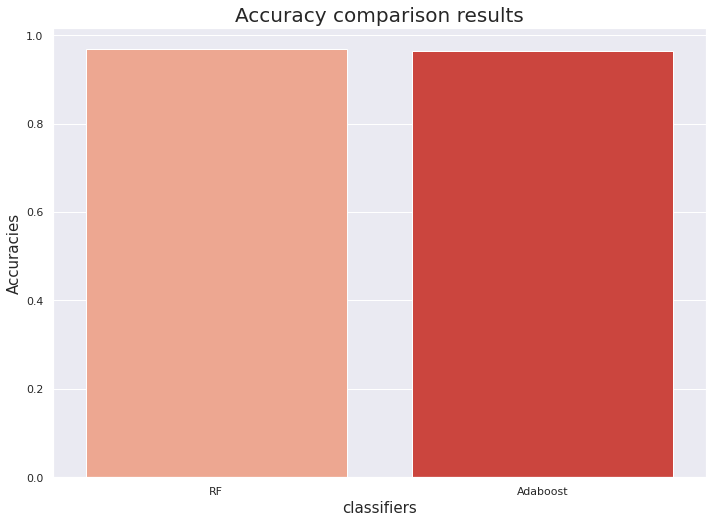

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="classifiers",y="Accuracies",data=accuracies, palette="Reds")

plt.xlabel("classifiers", fontsize = 15)
plt.ylabel("Accuracies", fontsize = 15)
plt.title("Accuracy comparison results", fontsize = 20) 
plt.show()

## **Conditional GAN**

### Prepare GAN

In [ ]:
# !pip uninstall keras
# !pip install keras==2.2.4
# !pip install tensorflow

In [ ]:
# !pip install -q git+https://github.com/tensorflow/docs 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import imageio

In [ ]:
#Constants and hyperparameters
batch_size = 64
num_channels = 11
num_classes = 2
latent_dim = 128

In [ ]:
#Calculating the number of input channel for the generator and discriminator
generator_in_channels = latent_dim + num_classes
discriminator_in_channels = num_channels + num_classes
print(generator_in_channels, discriminator_in_channels)

130 13


In [ ]:
labels = keras.utils.to_categorical(y_train, 2)
# Create tf.data.Dataset.
data = tf.data.Dataset.from_tensor_slices((X_train ,labels))
data = data.shuffle(buffer_size=1024).batch(batch_size)

print(f"Shape of training set: {X_train.shape}")
print(f"Shape of training set: {labels.shape}")

Shape of training set: (11587, 11)
Shape of training set: (11587, 2)


### Creating the discriminator and generator

In [ ]:
# Core layers
from keras.layers \
    import Activation, Dropout, Flatten, Dense, Input, LeakyReLU

# Normalization layers
from keras.layers import BatchNormalization

# Merge layers
from keras.layers import concatenate, multiply

# Embedding Layers
from keras.layers import Embedding

# Keras models
from keras.models import Model, Sequential

# Keras optimizers
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.optimizers import RMSprop, SGD


In [ ]:
# Create the discriminator.
discriminator = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape =   discriminator_in_channels),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),

        layers.Dense(1 ,activation="tanh")
    ],
    name="discriminator",
)

In [ ]:
# Create the generator.
generator = keras.Sequential(
    [
        keras.layers.InputLayer((generator_in_channels)),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(momentum=0.8),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(momentum=0.8),
        layers.Dense(11,activation="tanh")
    ],
    name="generator",
)

### Creating a ConditionalGAN model

In [ ]:
class ConditionalGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(ConditionalGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(ConditionalGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):
        # Unpack the data.
        real_Tasks, one_hot_labels = data
        # Add dummy dimensions to the labels so that they can be concatenated with
        # the Tasks. This is for the discriminator.

        Task_one_hot_labels = one_hot_labels[:, :, None, None]
        Task_one_hot_labels = tf.reshape(
            Task_one_hot_labels, (-1,  num_classes)
        )

        # Sample random points in the latent space and concatenate the labels.
        # This is for the generator.
        batch_size = tf.shape(real_Tasks)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_vector_labels = tf.concat(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Decode the noise (guided by labels) to fake Tasks.
        generated_Tasks = self.generator(random_vector_labels)

        # Combine them with real Tasks. Note that we are concatenating the labels
        # with these Tasks here.
        fake_Task_and_labels = tf.concat([generated_Tasks, Task_one_hot_labels], -1)

        real_Task_and_labels = tf.concat([real_Tasks, Task_one_hot_labels], -1)

        combined_Tasks = tf.concat(
            [fake_Task_and_labels, real_Task_and_labels], axis=0
        )

        # Assemble labels discriminating real from fake Tasks.
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )

        # Train the discriminator.
        with tf.GradientTape() as tape:

            predictions = self.discriminator(combined_Tasks)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space.
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_vector_labels = tf.concat(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Assemble labels that say "all real Tasks".
        misleading_labels = tf.zeros((batch_size, 1))
        
        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            fake_Tasks = self.generator(random_vector_labels)
            fake_Task_and_labels = tf.concat([fake_Tasks, Task_one_hot_labels], -1)

            predictions = self.discriminator(fake_Task_and_labels)
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Monitor loss.
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }

In [ ]:
cond_gan = ConditionalGAN(
    discriminator=discriminator, generator=generator, latent_dim=latent_dim
)
cond_gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

### Generate fake tasks


In [ ]:
cond_gan.fit(data, epochs = 20)

Epoch 1/20
182/182 [==============================] - 4s 13ms/step - g_loss: 1.0554 - d_loss: 0.8470
Epoch 2/20
182/182 [==============================] - 2s 12ms/step - g_loss: 2.7869 - d_loss: 0.1033
Epoch 3/20
182/182 [==============================] - 2s 13ms/step - g_loss: 4.2485 - d_loss: 0.0740
Epoch 4/20
182/182 [==============================] - 2s 12ms/step - g_loss: 3.1478 - d_loss: 1.2842
Epoch 5/20
182/182 [==============================] - 2s 13ms/step - g_loss: 1.7560 - d_loss: 0.4670
Epoch 6/20
182/182 [==============================] - 2s 13ms/step - g_loss: 1.5439 - d_loss: 0.5807
Epoch 7/20
182/182 [==============================] - 2s 12ms/step - g_loss: 0.8856 - d_loss: 0.7978
Epoch 8/20
182/182 [==============================] - 2s 13ms/step - g_loss: 0.8538 - d_loss: 0.6900
Epoch 9/20
182/182 [==============================] - 2s 13ms/step - g_loss: 0.8791 - d_loss: 0.6879
Epoch 10/20
182/182 [==============================] - 2s 13ms/step - g_loss: 0.9495 - d_lo

In [ ]:
#We first extract the trained generator from our Conditiona GAN.
trained_gen = cond_gan.generator

# Choose the number of intermediate Tasks that would be generated in
# between the interpolation + 2 (start and last Tasks).
num_interpolation = 1000  # @param {type:"integer"}

# Sample noise for the interpolation.
interpolation_noise = tf.random.normal(shape=(1, latent_dim))
interpolation_noise = tf.repeat(interpolation_noise, repeats=num_interpolation)
interpolation_noise = tf.reshape(interpolation_noise, (num_interpolation, latent_dim))


def interpolate_class(Class):
    # Convert the start and end labels to one-hot encoded vectors.
    first_label = keras.utils.to_categorical([Class]*num_interpolation, num_classes)

    noise_and_labels = tf.concat([interpolation_noise, first_label], 1)
    fake = trained_gen.predict(noise_and_labels)
    return fake


class_ = 1

fake_Tasks = interpolate_class(class_)

### Combined generated tasks with test dataset

In [ ]:
new_X_test = np.concatenate((fake_Tasks,X_test) , axis = 0)
new_y_test =  np.concatenate((y_test.values,np.zeros(num_interpolation)) , axis = 0).astype("int")
print(f"Shape of combined dataset: {len(new_X_test)}")
print(f"Shape of combined target: {len(new_y_test)}")

Shape of combined dataset: 3897
Shape of combined target: 3897


## **Classifier preformance after mix the data**

### RandomForestClassifier

In [ ]:
pre_rf_mixed =  rf.predict(new_X_test)
rf_acc_mixed = accuracy_score(new_y_test, pre_rf_mixed)

In [ ]:
print('testing accuracy of Random Forest Classifier with mixed dataset: {} %'.format(rf_acc_mixed * 100))
print('---------------------------------------------------------------')
print(classification_report(new_y_test, pre_rf_mixed))

testing accuracy of Random Forest Classifier with mixed dataset: 64.22889402104182 %
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.46      0.10      0.16      1369
           1       0.66      0.94      0.77      2528

    accuracy                           0.64      3897
   macro avg       0.56      0.52      0.47      3897
weighted avg       0.59      0.64      0.56      3897



### AdaBoostClassifier

In [ ]:
pre_ad_mixed = ad.predict(new_X_test)
ad_acc_mixed = accuracy_score(new_y_test, pre_ad_mixed)

In [ ]:
print('testing accuracy of AdaBoostClassifier with mixed dataset: {} %'.format(ad_acc_mixed * 100))
print('---------------------------------------------------------------')
print(classification_report(new_y_test, pre_ad_mixed))

testing accuracy of AdaBoostClassifier with mixed dataset: 64.43418013856814 %
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.47      0.12      0.19      1369
           1       0.66      0.93      0.77      2528

    accuracy                           0.64      3897
   macro avg       0.57      0.52      0.48      3897
weighted avg       0.59      0.64      0.57      3897



### Plotting

In [ ]:
dic_mix = {
    'classifiers': ['RF' , 'Adaboost'],
    'Accuracies' : [rf_acc_mixed,ad_acc_mixed] }

accuracies_mix = pd.DataFrame.from_dict(dic_mix)

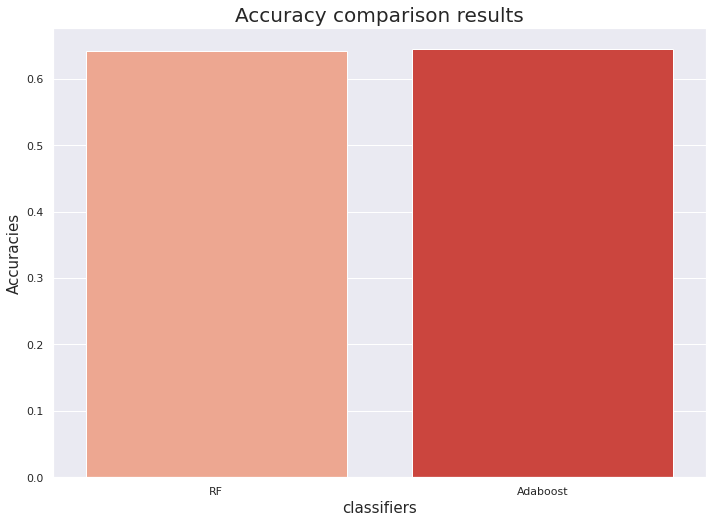

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="classifiers",y="Accuracies",data=accuracies_mix, palette="Reds")

plt.xlabel("classifiers", fontsize = 15)
plt.ylabel("Accuracies", fontsize = 15)
plt.title("Accuracy comparison results", fontsize = 20) 
plt.show()

## **Cascade framwork**

In [ ]:
labels_ = keras.utils.to_categorical(new_y_test, 2)
random_vectors = tf.concat([new_X_test, labels_], axis=1 )

In [ ]:
discrim_predict = cond_gan.discriminator.predict(random_vectors)
discrim_predict = np.round(discrim_predict) 
Real_indexs = np.where(discrim_predict == 1)[0]

In [ ]:
Real_indexs.shape

(2419,)

In [ ]:
Testr = new_X_test[Real_indexs]
labelr = np.ones(Testr.shape[0]).astype("int")

In [ ]:
labelr.shape

(2419,)

## **Classifier preformance with cascade framwork**

### RandomForestClassifier

In [ ]:
pre_rf_cas =  rf.predict(Testr)
rf_acc_cas = accuracy_score(labelr, pre_rf_cas)

In [ ]:
print('testing accuracy of Random Forest Classifier with mixed dataset: {} %'.format(rf_acc_cas * 100))
print('---------------------------------------------------------------')
print(classification_report(labelr, pre_rf_cas))

testing accuracy of Random Forest Classifier with mixed dataset: 92.31087226126499 %
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96      2419

    accuracy                           0.92      2419
   macro avg       0.50      0.46      0.48      2419
weighted avg       1.00      0.92      0.96      2419



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### AdaBoostClassifier

In [ ]:
pre_ad_cas = ad.predict(Testr)
ad_acc_cas = accuracy_score(labelr, pre_ad_cas)

In [ ]:
print('testing accuracy of AdaBoostClassifier with mixed dataset: {} %'.format(ad_acc_cas * 100))
print('---------------------------------------------------------------')
print(classification_report(labelr, pre_ad_cas))

testing accuracy of AdaBoostClassifier with mixed dataset: 91.27738735014469 %
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.91      0.95      2419

    accuracy                           0.91      2419
   macro avg       0.50      0.46      0.48      2419
weighted avg       1.00      0.91      0.95      2419



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plotting

In [ ]:
dic_cas = {
    'classifiers': ['RF' , 'Adaboost'],
    'Accuracies' : [rf_acc_cas,ad_acc_cas] }

accuracies_cas = pd.DataFrame.from_dict(dic_cas)

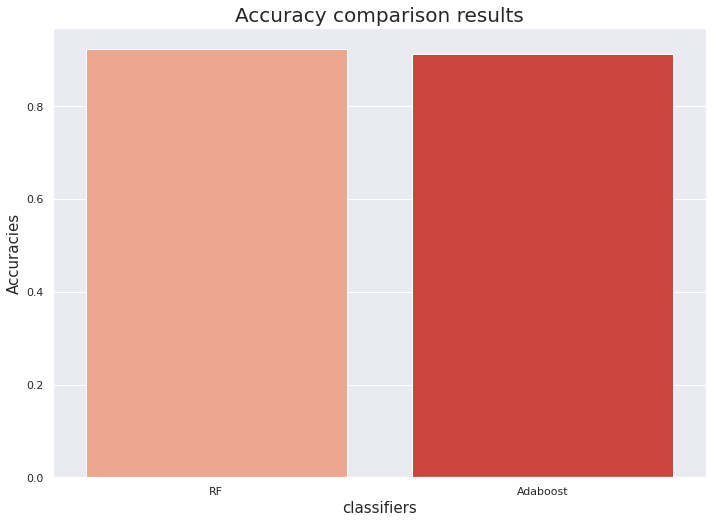

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="classifiers",y="Accuracies",data=accuracies_cas, palette="Reds")

plt.xlabel("classifiers", fontsize = 15)
plt.ylabel("Accuracies", fontsize = 15)
plt.title("Accuracy comparison results", fontsize = 20) 
plt.show()

## **Compare classifiers before and after cascade**

In [ ]:
rf_dic = {
    'classifiers': ['RF' , 'RF & cascade'],
    'Accuracies' : [rf_acc_mixed , rf_acc_cas] }

accuracies_cas_rf = pd.DataFrame.from_dict(rf_dic)


ad_dic = {
    'classifiers': ['Ad' , 'Ad & cascade'],
    'Accuracies' : [ad_acc_mixed,ad_acc_cas] }

accuracies_cas_ad = pd.DataFrame.from_dict(ad_dic)

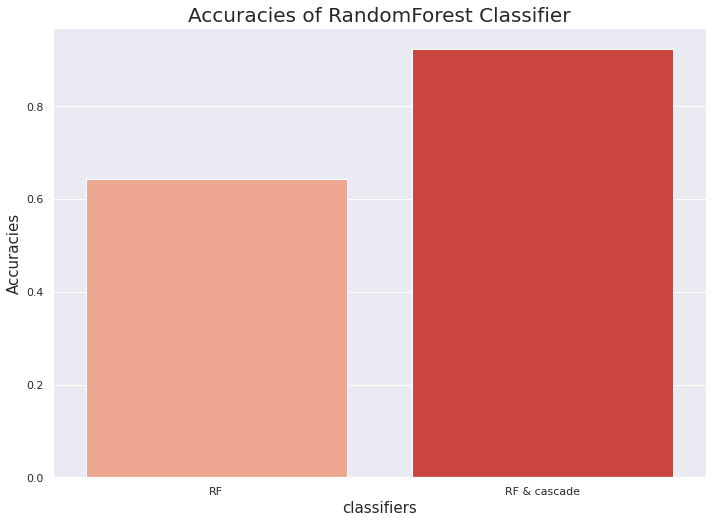

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="classifiers",y="Accuracies",data=accuracies_cas_rf, palette="Reds")

plt.xlabel("classifiers", fontsize = 15)
plt.ylabel("Accuracies", fontsize = 15)
plt.title("Accuracies of RandomForest Classifier", fontsize = 20) 
plt.show()

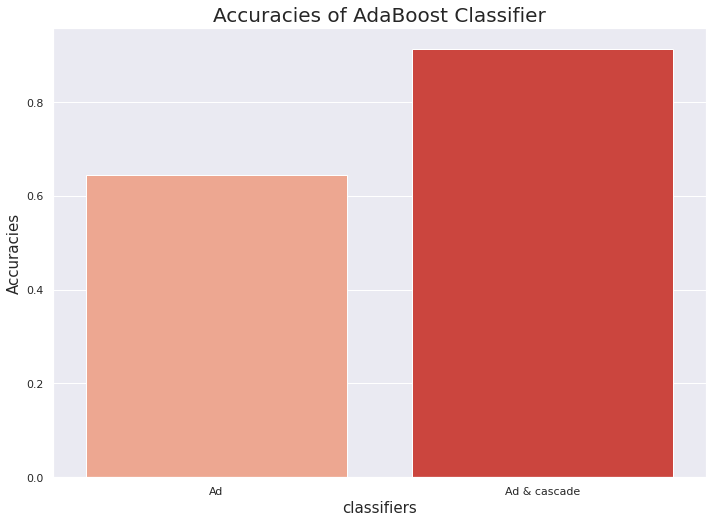

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="classifiers",y="Accuracies",data=accuracies_cas_ad, palette="Reds")

plt.xlabel("classifiers", fontsize = 15)
plt.ylabel("Accuracies", fontsize = 15)
plt.title("Accuracies of AdaBoost Classifier", fontsize = 20) 
plt.show()